In [1]:
from qiskit import QuantumCircuit
from azure.quantum_qiskit import AzureQuantumProvider

from utils import plot_results

# Azure Quantum Provider
provider = AzureQuantumProvider(
  resource_id="/subscriptions/916dfd6d-030c-4bd9-b579-7bb6d1926e97/resourceGroups/anpaz-demos/providers/Microsoft.Quantum/Workspaces/demo15",
  location="westus"
)

In [2]:
# Show all current supported backends in this workspace:
print([backend.name() for backend in provider.backends()])


['ionq.simulator', 'ionq.qpu']


In [3]:
# Create a Quantum Circuit acting on the q register
circuit = QuantumCircuit(2, 2)
circuit.name = "Qiskit Sample - MBR"
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1], [0, 1])

# Print out the circuit
print("================== Running circuit: ==================")
print(circuit.draw())
print("======================================================")


================== Running circuit: ==================
     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


In [4]:
# Get IonQ's simulator backend:
simulator_backend = provider.get_backend("ionq.simulator")

# Submit the circuit to run on Azure Quantum
job = simulator_backend.run(circuit, shots=250)
id = job.id()
print("Job id", id)

Job id 8cbc0ee4-ee20-11eb-a7be-2816a847b9a3


This is just a simple function to plot the result's histogram using `matplotlib`.

In [5]:
import matplotlib.pyplot as plt

def plot_results(job):
    result = job.result()
    count = int(job._azure_job.details.metadata['qubits'])
    histogram = result.results['histogram']

    data = []
    for i in range(1 << count):
        value = histogram[str(i)] if str(i) in histogram else 0
        data.append(value)

    axes = plt.gca()
    axes.set_ylim([0,1])

    plt.bar(range(1 << count), data)
    plt.show()



Results histogram {'0': 0.5, '3': 0.5}


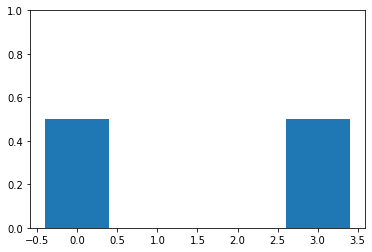

In [6]:
# Get the job results (this method waits for the Job to complete):
result = job.result()
histogram = result.results['histogram']
print()
print("Results histogram", histogram)

# Show the histogram as a plot:
plot_results(job)
